In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re

%matplotlib inline
rcParams['figure.figsize'] = 10,8

In [2]:
df_train = pd.read_csv("input/train.csv")
df_test = pd.read_csv("input/test.csv")

In [3]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print (df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [5]:
print (df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [8]:
df_train['Title'] = df_train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
df_test['Title'] = df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

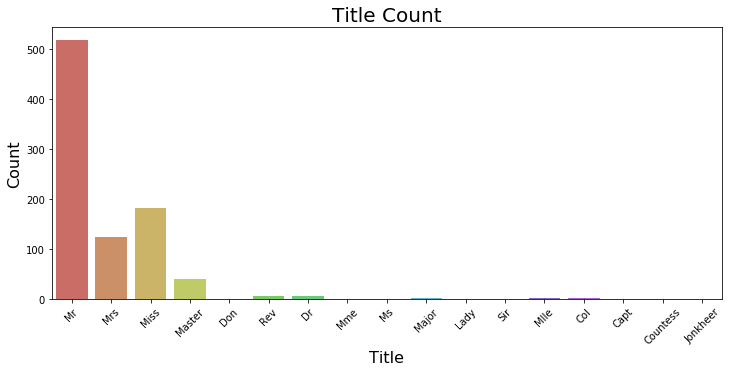

In [9]:
plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='Title', data=df_train, palette="hls")
plt.xlabel("Title", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Title Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [10]:
Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
    
# we map each title to correct category
df_train['Title'] = df_train.Title.map(Title_Dictionary)
df_test['Title'] = df_test.Title.map(Title_Dictionary)

Chances to survive based on titles: 
Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.795276
Officer    0.277778
Royalty    0.500000
Name: Survived, dtype: float64


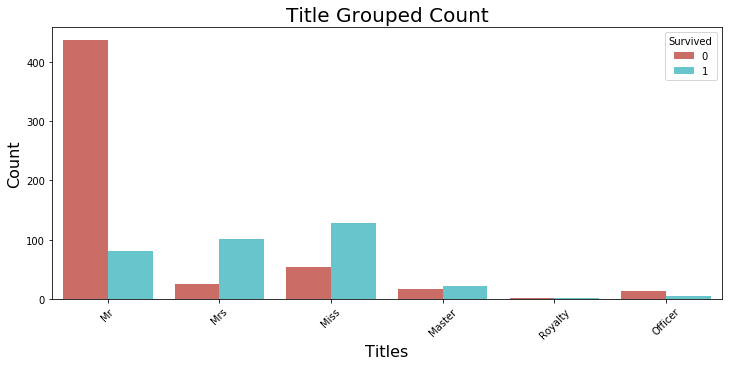

In [11]:
print("Chances to survive based on titles: ")
print(df_train.groupby("Title")["Survived"].mean())

plt.figure(figsize=(12,5))
#Plotting the results
sns.countplot(x='Title', data=df_train, palette="hls", hue="Survived")
plt.xlabel("Titles", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Title Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

/home/suraj/anaconda2/envs/tensorflow/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


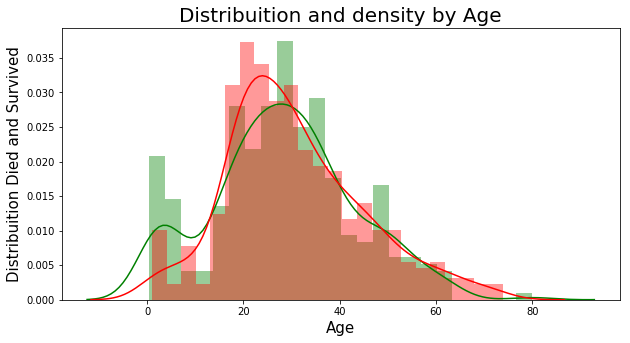

In [12]:
#First I will look my distribuition without NaN's
#I will create a df to look distribuition 
age_high_zero_died = df_train[(df_train["Age"] > 0) & 
                              (df_train["Survived"] == 0)]
age_high_zero_surv = df_train[(df_train["Age"] > 0) & 
                              (df_train["Survived"] == 1)]
plt.figure(figsize=(10,5))

sns.distplot(age_high_zero_surv["Age"], bins=24, color='g')
sns.distplot(age_high_zero_died["Age"], bins=24, color='r')
plt.title("Distribuition and density by Age",fontsize=20)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Distribuition Died and Survived",fontsize=15)
plt.show()



In [13]:
#Let's group the median age by sex, pclass and title, to have any idea and maybe input in Age NAN's

age_group = df_train.groupby(["Sex","Pclass","Title"])["Age"]

print(age_group.median())

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    48.0
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64


In [14]:
print(df_train["Age"].isnull().sum())

177


In [15]:
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')

print(df_train["Age"].isnull().sum())

0


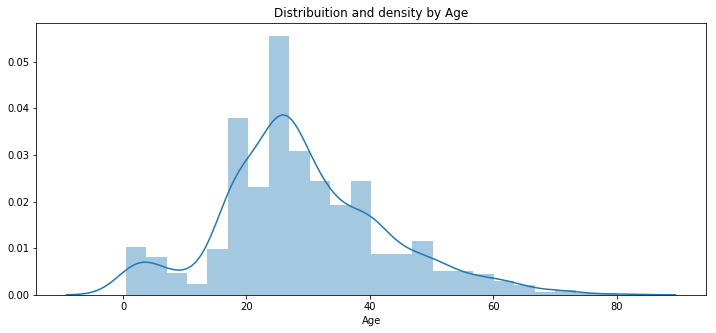

In [16]:
plt.figure(figsize=(12,5))
sns.distplot(df_train["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show()

<Figure size 864x360 with 0 Axes>

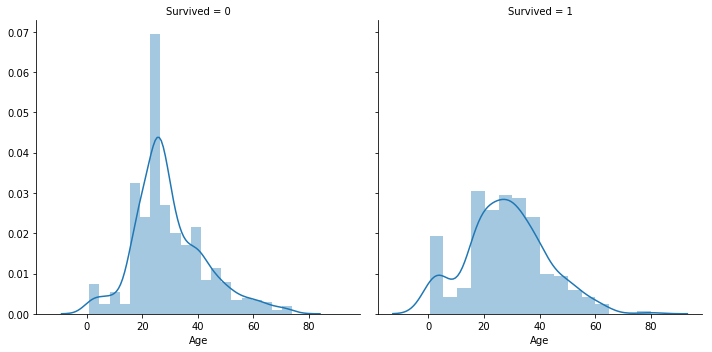

In [17]:
plt.figure(figsize=(12,5))

g = sns.FacetGrid(df_train, col='Survived', height=5)
g = g.map(sns.distplot, "Age")
plt.show()

In [18]:
interval = (0, 5, 12, 18, 25, 35, 60, 120)
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

df_train["Age_cat"] = pd.cut(df_train.Age, interval, labels=cats)
df_test["Age_cat"] = pd.cut(df_test.Age, interval, labels=cats)
print df_train["Age_cat"].head()
print df_test["Age_cat"].head()

0    Student
1      Adult
2      Young
3      Young
4      Young
Name: Age_cat, dtype: category
Categories (7, object): [babies < Children < Teen < Student < Young < Adult < Senior]
0      Young
1      Adult
2     Senior
3      Young
4    Student
Name: Age_cat, dtype: category
Categories (7, object): [babies < Children < Teen < Student < Young < Adult < Senior]


Survived    0   1
Age_cat          
babies     15  33
Children   16   9
Teen       54  49
Student   108  56
Young     206  99
Adult     133  91
Senior     17   5


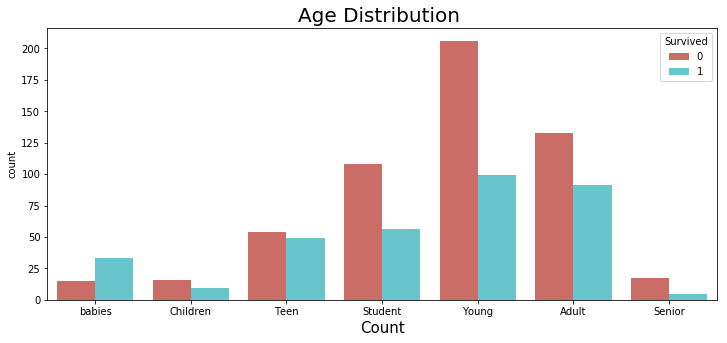

In [19]:
#Describe of categorical Age
print(pd.crosstab(df_train.Age_cat, df_train.Survived))
plt.figure(figsize=(12,5))
#Plotting the result
sns.countplot("Age_cat",data=df_train, hue="Survived", palette="hls")
plt.xlabel("Categories names", fontsize=15)
plt.xlabel("Count", fontsize=15)
plt.title("Age Distribution ", fontsize=20)
plt.show()

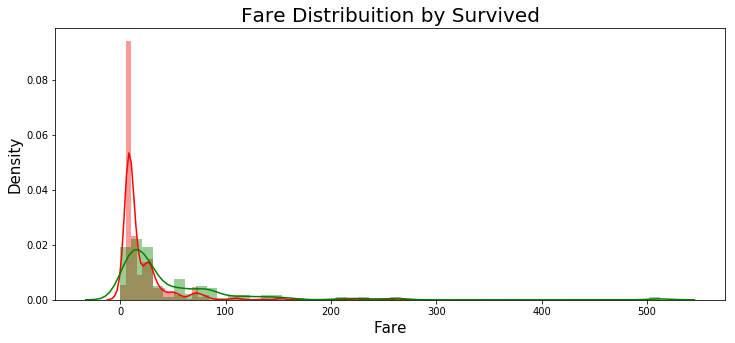

In [20]:
#Looking the Fare distribuition to survivors and not survivors
plt.figure(figsize=(12,5))

sns.distplot(df_train[df_train.Survived == 0]["Fare"], 
             bins=50, color='r')
sns.distplot(df_train[df_train.Survived == 1]["Fare"], 
             bins=50, color='g')
plt.title("Fare Distribuition by Survived", fontsize=20)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

Survived    0    1
Fare_cat          
NoInf      14    1
quart_1   175   51
quart_2   155   62
quart_3   112   99
quart_4    93  129


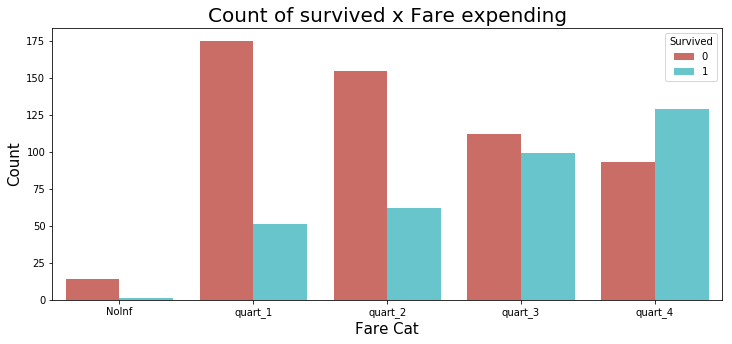

In [21]:
#Filling the NA's with -0.5
df_train.Fare = df_train.Fare.fillna(-0.5)

#intervals to categorize
quant = (-1, 0, 8, 15, 31, 600)

#Labels without input values
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

#doing the cut in fare and puting in a new column
df_train["Fare_cat"] = pd.cut(df_train.Fare, quant, labels=label_quants)

#Description of transformation
print(pd.crosstab(df_train.Fare_cat, df_train.Survived))

plt.figure(figsize=(12,5))

#Plotting the new feature
sns.countplot(x="Fare_cat", hue="Survived", data=df_train, palette="hls")
plt.title("Count of survived x Fare expending",fontsize=20)
plt.xlabel("Fare Cat",fontsize=15)
plt.ylabel("Count",fontsize=15)

plt.show()

In [22]:
# Replicate the same to df_test
df_test.Fare = df_test.Fare.fillna(-0.5)

quant = (-1, 0, 8, 15, 31, 1000)
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

df_test["Fare_cat"] = pd.cut(df_test.Fare, quant, labels=label_quants)

In [23]:
#Now lets drop the variable Fare, Age and ticket that is irrelevant now
del df_train["Fare"]
del df_train["Ticket"]
del df_train["Age"]
del df_train["Cabin"]
del df_train["Name"]

#same in df_test
del df_test["Fare"]
del df_test["Ticket"]
del df_test["Age"]
del df_test["Cabin"]
del df_test["Name"]

In [24]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_cat,Fare_cat
0,1,0,3,male,1,0,S,Mr,Student,quart_1
1,2,1,1,female,1,0,C,Mrs,Adult,quart_4
2,3,1,3,female,0,0,S,Miss,Young,quart_1
3,4,1,1,female,1,0,S,Mrs,Young,quart_4
4,5,0,3,male,0,0,S,Mr,Young,quart_2


Total of Survived or not: 
Survived
0    549
1    342
Name: PassengerId, dtype: int64


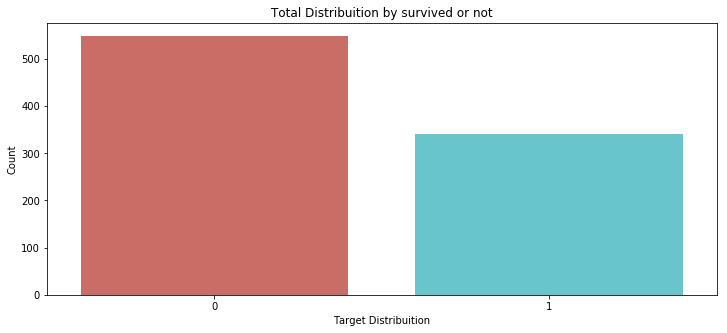

In [25]:
# Let see how many people die or survived
print("Total of Survived or not: ")
print(df_train.groupby("Survived")["PassengerId"].count())

plt.figure(figsize=(12,5))

sns.countplot(x="Survived", data=df_train, palette="hls")
plt.title('Total Distribuition by survived or not')
plt.xlabel('Target Distribuition')
plt.ylabel('Count')

plt.show()

Sex       female  male
Survived              
0             81   468
1            233   109


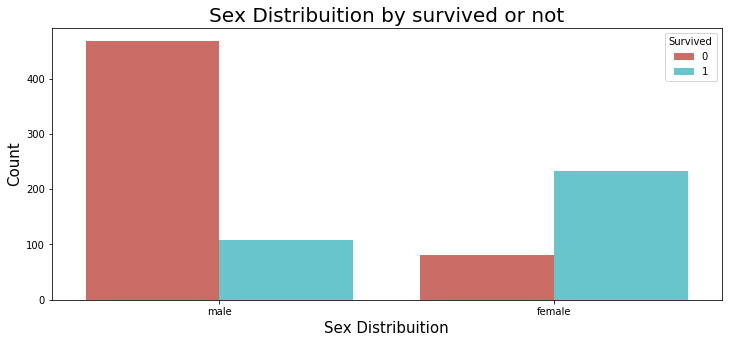

In [26]:
print(pd.crosstab(df_train.Survived, df_train.Sex))

plt.figure(figsize=(12,5))
sns.countplot(x="Sex", data=df_train, hue="Survived",palette="hls")
plt.title('Sex Distribuition by survived or not', fontsize=20)
plt.xlabel('Sex Distribuition',fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


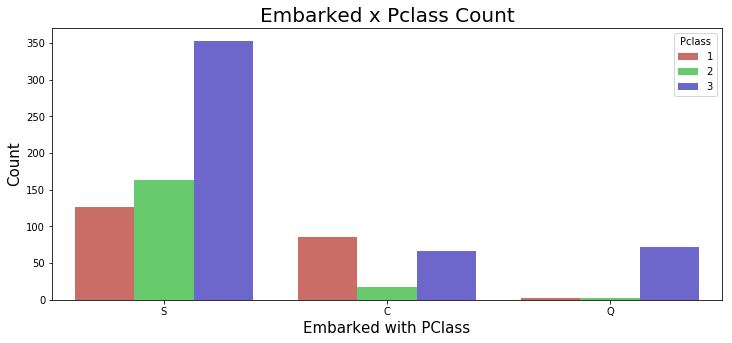

In [27]:
# Distribuition by class
print(pd.crosstab(df_train.Pclass, df_train.Embarked))

plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df_train, hue="Pclass",palette="hls")
plt.title('Embarked x Pclass Count', fontsize=20)
plt.xlabel('Embarked with PClass',fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

In [28]:
#lets input the NA's with the highest frequency
df_train["Embarked"] = df_train["Embarked"].fillna('S')

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


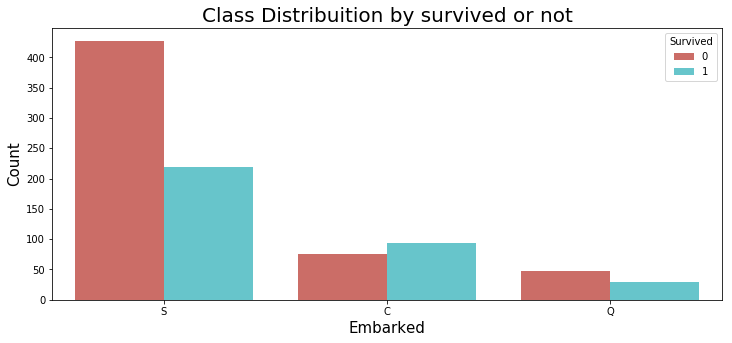

In [29]:
# Exploring Survivors vs Embarked
print(pd.crosstab(df_train.Survived, df_train.Embarked))

plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df_train, hue="Survived",palette="hls")
plt.title('Class Distribuition by survived or not',fontsize=20)
plt.xlabel('Embarked',fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


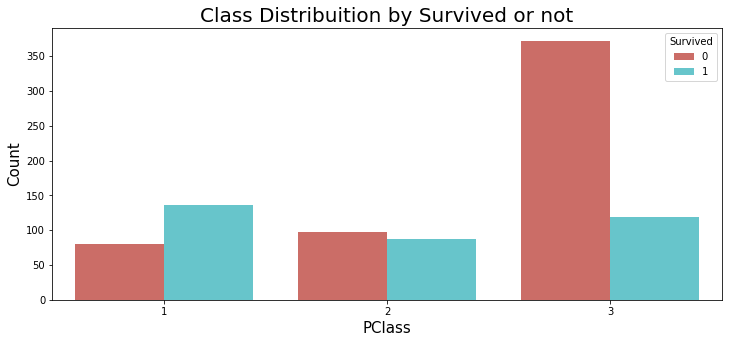

In [30]:
# Exploring Survivors vs Pclass
print(pd.crosstab(df_train.Survived, df_train.Pclass))

plt.figure(figsize=(12,5))

sns.countplot(x="Pclass", data=df_train, hue="Survived",palette="hls")
plt.xlabel('PClass',fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Class Distribuition by Survived or not', fontsize=20)

plt.show()

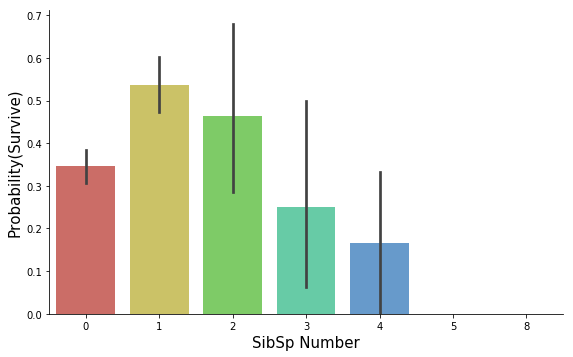

In [31]:
g = sns.catplot(x="SibSp",y="Survived",data=df_train,kind="bar", height = 5, aspect= 1.6, palette = "hls")
g.set_ylabels("Probability(Survive)", fontsize=15)
g.set_xlabels("SibSp Number", fontsize=15)

plt.show()

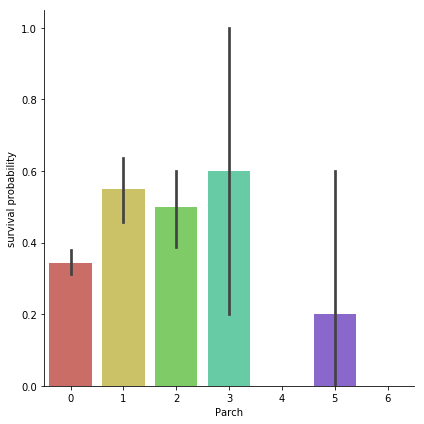

In [32]:
# Explore Parch feature vs Survived
g  = sns.catplot(x="Parch", y="Survived", data=df_train, kind="bar", height = 6, palette = "hls")
g = g.set_ylabels("survival probability")

In [33]:
#Create a new column and sum the Parch + SibSp + 1 that refers the people self
df_train["FSize"] = df_train["Parch"] + df_train["SibSp"] + 1

df_test["FSize"] = df_test["Parch"] + df_test["SibSp"] + 1

Survived    0    1
FSize             
1         374  163
2          72   89
3          43   59
4           8   21
5          12    3
6          19    3
7           8    4
8           6    0
11          7    0


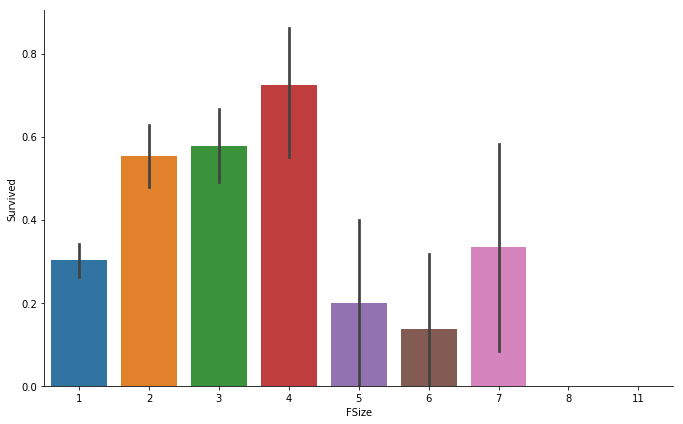

In [34]:
print(pd.crosstab(df_train.FSize, df_train.Survived))
sns.catplot(x="FSize",y="Survived", data=df_train, kind="bar", height=6, aspect=1.6)
plt.show()

In [35]:
del df_train["SibSp"]
del df_train["Parch"]

del df_test["SibSp"]
del df_test["Parch"]

In [36]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,Age_cat,Fare_cat,FSize
0,1,0,3,male,S,Mr,Student,quart_1,2
1,2,1,1,female,C,Mrs,Adult,quart_4,2
2,3,1,3,female,S,Miss,Young,quart_1,1
3,4,1,1,female,S,Mrs,Young,quart_4,2
4,5,0,3,male,S,Mr,Young,quart_2,1


In [37]:
df_train = pd.get_dummies(df_train, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                          prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

df_test = pd.get_dummies(df_test, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                         prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

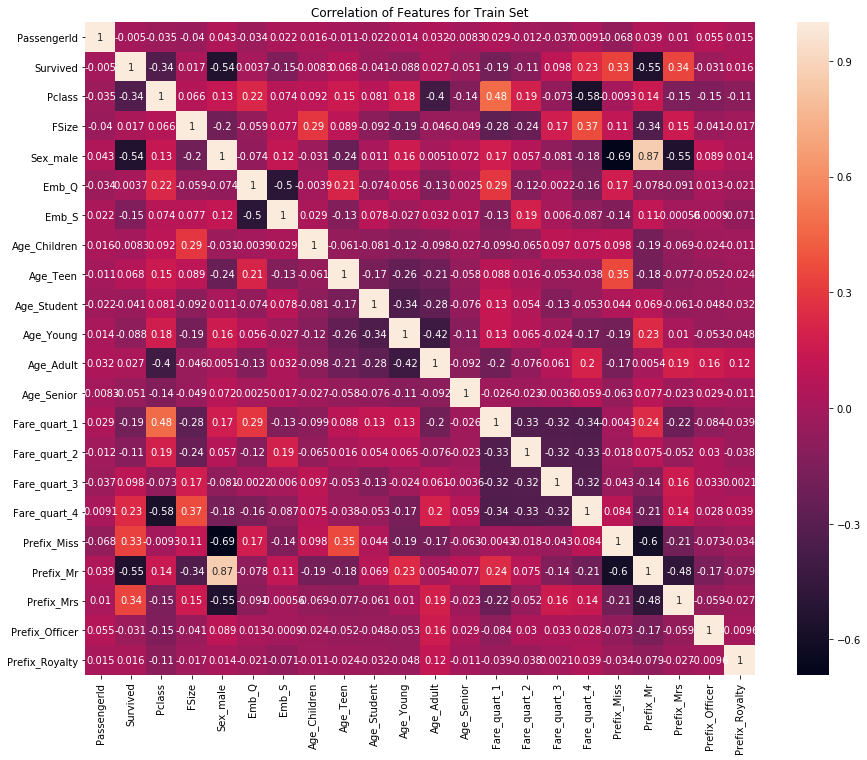

In [38]:
#Finallt, lets look the correlation of df_train
plt.figure(figsize=(15,12))
plt.title('Correlation of Features for Train Set')
sns.heatmap(df_train.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [39]:
df_train.shape

(891, 22)

In [40]:
df_train.head()

,PassengerId,Survived,Pclass,FSize,Sex_male,Emb_Q,Emb_S,Age_Children,Age_Teen,Age_Student,...,Age_Senior,Fare_quart_1,Fare_quart_2,Fare_quart_3,Fare_quart_4,Prefix_Miss,Prefix_Mr,Prefix_Mrs,Prefix_Officer,Prefix_Royalty
0,1,0,3,2,1,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,4,1,1,2,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,5,0,3,1,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [41]:
train = df_train.drop(["Survived","PassengerId"],axis=1)
train_ = df_train["Survived"]

test_ = df_test.drop(["PassengerId"],axis=1)

X_train = train.values
y_train = train_.values

X_test = test_.values
X_test = X_test.astype(np.float64, copy=False)

In [42]:
X_train[5]

array([3, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [43]:
X_test[5]

array([3., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0.])

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

/home/suraj/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/suraj/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [45]:
X_train[5]

array([ 0.82737724, -0.56097483,  0.73769513,  3.25137334, -1.62380254,
       -0.16990692, -0.36153929, -0.47495747,  1.3861138 , -0.57951021,
       -0.15911146, -0.58296623,  1.76238213, -0.5570405 , -0.57605431,
       -0.51015154,  0.85053175, -0.40771358, -0.14359163, -0.06715343])

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD

Using TensorFlow backend.


In [47]:
# Creating the model
model = Sequential()

# Inputing the first layer with input dimensions
model.add(Dense(15, activation='relu',  input_dim=20, kernel_initializer='uniform'))

# Adding an Dropout layer to prevent from overfitting
model.add(Dropout(0.3))

#adding second hidden layer 
model.add(Dense(15, kernel_initializer='uniform', activation='tanh'))

# Adding another Dropout layer
model.add(Dropout(0.3))

# #adding third hidden layer 
# model.add(Dense(128, kernel_initializer='uniform', activation='relu'))

# # Adding another Dropout layer
# model.add(Dropout(0.50))

# adding the output layer that is binary [0,1]
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
#With such a scalar sigmoid output on a binary classification problem, the loss
#function you should use is binary_crossentropy

#Visualizing the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [48]:
#Creating an Stochastic Gradient Descent
sgd = SGD(lr = 0.01, momentum = 0.9)

# Compiling our model
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])
#optimizers list
#optimizers['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 60, verbose=1, validation_split = 0.2)


Train on 712 samples, validate on 179 samples
Epoch 1/60
712/712 [==============================] - 1s 955us/step - loss: 0.6790 - acc: 0.6025 - val_loss: 0.6567 - val_acc: 0.6425
Epoch 2/60
712/712 [==============================] - 0s 291us/step - loss: 0.6695 - acc: 0.6096 - val_loss: 0.6529 - val_acc: 0.6425
Epoch 3/60
712/712 [==============================] - 0s 261us/step - loss: 0.6687 - acc: 0.6096 - val_loss: 0.6510 - val_acc: 0.6425
Epoch 4/60
712/712 [==============================] - 0s 235us/step - loss: 0.6660 - acc: 0.6096 - val_loss: 0.6449 - val_acc: 0.6425
Epoch 5/60
712/712 [==============================] - 0s 230us/step - loss: 0.6491 - acc: 0.6180 - val_loss: 0.5993 - val_acc: 0.6425
Epoch 6/60
712/712 [==============================] - 0s 482us/step - loss: 0.5633 - acc: 0.7191 - val_loss: 0.4497 - val_acc: 0.8045
Epoch 7/60
712/712 [==============================] - 0s 197us/step - loss: 0.4949 - acc: 0.7669 - val_loss: 0.4161 - val_acc: 0.8156
Epoch 8/60
712/7

In [49]:
scores = model.evaluate(X_train, y_train, batch_size=30)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

891/891 [==============================] - 0s 65us/step
acc: 85.63%


In [50]:
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.20, 
                    epochs=60, batch_size=5, verbose=1)

# list all data in history
print(history.history.keys())

Train on 712 samples, validate on 179 samples
Epoch 1/60
712/712 [==============================] - 1s 824us/step - loss: 0.4000 - acc: 0.8357 - val_loss: 0.3690 - val_acc: 0.8492
Epoch 2/60
712/712 [==============================] - 1s 805us/step - loss: 0.4079 - acc: 0.8343 - val_loss: 0.3596 - val_acc: 0.8324
Epoch 3/60
712/712 [==============================] - 1s 994us/step - loss: 0.4079 - acc: 0.8357 - val_loss: 0.3589 - val_acc: 0.8436
Epoch 4/60
712/712 [==============================] - 1s 838us/step - loss: 0.4095 - acc: 0.8301 - val_loss: 0.3546 - val_acc: 0.8380
Epoch 5/60
712/712 [==============================] - 1s 774us/step - loss: 0.4034 - acc: 0.8427 - val_loss: 0.3589 - val_acc: 0.8268
Epoch 6/60
712/712 [==============================] - 1s 794us/step - loss: 0.4120 - acc: 0.8343 - val_loss: 0.3650 - val_acc: 0.8324
Epoch 7/60
712/712 [==============================] - 1s 947us/step - loss: 0.4069 - acc: 0.8399 - val_loss: 0.3536 - val_acc: 0.8380
Epoch 8/60
712/7

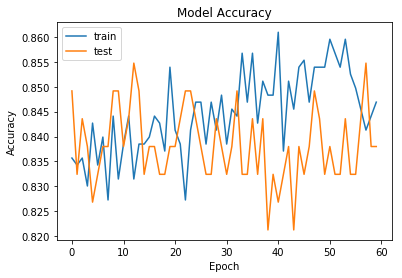

In [51]:
# summarizing historical accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

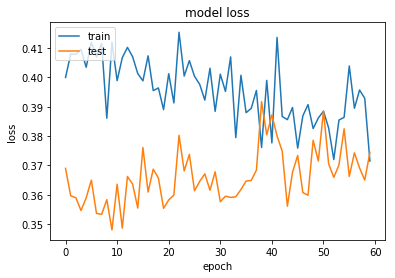

In [52]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import pyspark